## Extract molecular descriptors using mordred library

[https://github.com/mordred-descriptor/mordred](https://github.com/mordred-descriptor/mordred)

In [1]:
from rdkit import Chem
from mordred import Calculator, descriptors
import pandas as pd
import numpy as np

n = len(Calculator(descriptors, ignore_3D=False))
n_2d = len(Calculator(descriptors, ignore_3D=True))
n_3d = n - n_2d
print("Total number of descriptors: {}".format(n))
print("Total number of 2D descriptors: {}".format(n_2d))
print("Total number of 3D descriptors: {}".format(n_3d))

Total number of descriptors: 1826
Total number of 2D descriptors: 1613
Total number of 3D descriptors: 213


In [2]:
data = pd.read_csv("../data/smile.csv")
calc = Calculator(descriptors, ignore_3D=False)
mols = [Chem.MolFromSmiles(smi) for smi in data["SMILE"]]
descriptors = calc.pandas(mols)

RDKit ERROR: [14:50:01] SMILES Parse Error: extra open parentheses for input: 'O=C1C(OC(C(C(O[H])([H])C([H])4°[H])([H])O[H])([H])OC4([H])C([H])([H])O[H])=C(C3=C([H])C(O[H])=C(O[H])C([H])=C3[H])OC2=C1C(O[H])=C([H])C(O[H])=C2[H]'
RDKit ERROR: [14:50:01] SMILES Parse Error: extra open parentheses for input: 'O=C1C(OC3([H])OC(C(O[H])([H])C([H])([H])O[H])([H])C(O[H])([H])C([H])3°[H])=C(C4=C([H])C(O[H])=C(O[H])C([H])=C4[H])OC2=C1C(O[H])=C([H])C(O[H])=C2[H]'
RDKit ERROR: [14:50:01] SMILES Parse Error: extra open parentheses for input: 'O=C1C(OC(OC(C([H])([H])[H])([H])C(O[H])([H])C([H])3°[H])([H])C3([H])O[H])=C(C4=C([H])C(O[H])=C(O[H])C([H])=C4[H])OC2=C1C(O[H])=C([H])C(O[H])=C2[H]'
RDKit ERROR: [14:50:01] SMILES Parse Error: syntax error while parsing: C1CC(CL)CCC1C(N4CCNC4)(C2CCCCC2)C3CCCCC3
RDKit ERROR: [14:50:01] SMILES Parse Error: Failed parsing SMILES 'C1CC(CL)CCC1C(N4CCNC4)(C2CCCCC2)C3CCCCC3' for input: 'C1CC(CL)CCC1C(N4CCNC4)(C2CCCCC2)C3CCCCC3'
RDKit ERROR: [14:50:01] SMILES Parse Erro

  9%|▉         | 32/352 [00:02<00:47,  6.75it/s]

/Users/pengwang/opt/anaconda3/envs/hpxr/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 15%|█▌        | 53/352 [00:02<00:15, 19.79it/s]


TypeError: None is not rdkit.Chem.Mol instance

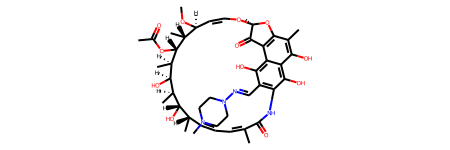

In [9]:
Chem.MolFromSmiles("C[C@H]1/C=C/C=C(\C(=O)NC2=C(C(=C3C(=C2O)C(=C(C4=C3C(=O)[C@](O4)(O/C=C/[C@@H]([C@H]([C@H]([C@@H]([C@@H]([C@@H]([C@H]1O)C)O)C)OC(=O)C)C)OC)C)C)O)O)/C=N/N5CCN(CC5)C)/C")

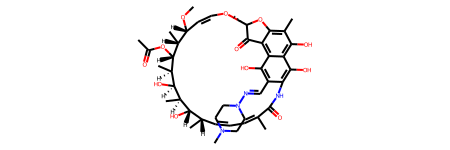

In [11]:
Chem.MolFromSmiles("O=C3C2=C(C4=C(O[H])C(C([H])([H])[H])=C2O[C@](O/C([H])=C([H])/[C@@]([C@@]([C@@]([C@]5([H])[C@@]([H])([H])[H])([H])OC(C([H])([H])[H])=O)([H])[C@]([H])([H])[H])([H])OC([H])([H])[H])3[C@@]([H])([H])[H])C(O[H])=C(C(N([H])C(/C(C([H])([H])[H])=C([H])/C([H])=C([H])/[C@]([C@]([C@]([C@@]([H])([H])[H])([H])[C@]([H])5O[H])([H])O[H])([H])[C@@]([H])([H])[H])=O)=C4O[H])/C([H])=N/N1C([H])([H])C([H])([H])N(C([H])([H])[H])C([H])([H])C([H])1[H]")

In [23]:
cnt = 0
for name, smile in data[["Compound \nName","SMILE"]].values:
    try:
        Chem.MolFromSmiles(smile)
    except e:
        cnt += 1
        pass
print(cnt)

0


RDKit ERROR: [15:13:50] SMILES Parse Error: extra open parentheses for input: 'O=C1C(OC(C(C(O[H])([H])C([H])4°[H])([H])O[H])([H])OC4([H])C([H])([H])O[H])=C(C3=C([H])C(O[H])=C(O[H])C([H])=C3[H])OC2=C1C(O[H])=C([H])C(O[H])=C2[H]'
RDKit ERROR: [15:13:50] SMILES Parse Error: extra open parentheses for input: 'O=C1C(OC3([H])OC(C(O[H])([H])C([H])([H])O[H])([H])C(O[H])([H])C([H])3°[H])=C(C4=C([H])C(O[H])=C(O[H])C([H])=C4[H])OC2=C1C(O[H])=C([H])C(O[H])=C2[H]'
RDKit ERROR: [15:13:50] SMILES Parse Error: extra open parentheses for input: 'O=C1C(OC(OC(C([H])([H])[H])([H])C(O[H])([H])C([H])3°[H])([H])C3([H])O[H])=C(C4=C([H])C(O[H])=C(O[H])C([H])=C4[H])OC2=C1C(O[H])=C([H])C(O[H])=C2[H]'
RDKit ERROR: [15:13:50] SMILES Parse Error: syntax error while parsing: C1CC(CL)CCC1C(N4CCNC4)(C2CCCCC2)C3CCCCC3
RDKit ERROR: [15:13:50] SMILES Parse Error: Failed parsing SMILES 'C1CC(CL)CCC1C(N4CCNC4)(C2CCCCC2)C3CCCCC3' for input: 'C1CC(CL)CCC1C(N4CCNC4)(C2CCCCC2)C3CCCCC3'
RDKit ERROR: [15:13:50] SMILES Parse Erro

In [16]:
data.loc[data["SMILE"]=="O=C1C(OC(C(C(O[H])([H])C([H])4°[H])([H])O[H])([H])OC4([H])C([H])([H])O[H])=C(C3=C([H])C(O[H])=C(O[H])C([H])=C3[H])OC2=C1C(O[H])=C([H])C(O[H])=C2[H]", "Compound \nName"]

75    hyperoside
Name: Compound \nName, dtype: object

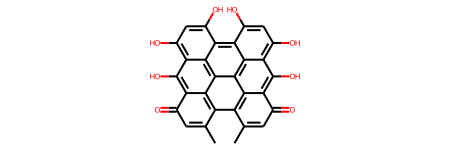

In [17]:
Chem.MolFromSmiles("CC1=CC(=O)C2=C(C3=C(C=C(C4=C3C5=C2C1=C6C(=CC(=O)C7=C(C8=C(C=C(C4=C8C5=C67)O)O)O)C)O)O)O")

In [19]:
Chem.MolFromSmiles("O=C1C(OC(C(C(O[H])([H])C([H])4°[H])([H])O[H])([H])OC4([H])C([H])([H])O[H])=C(C3=C([H])C(O[H])=C(O[H])C([H])=C3[H])OC2=C1C(O[H])=C([H])C(O[H])=C2[H]")

RDKit ERROR: [15:07:44] SMILES Parse Error: extra open parentheses for input: 'O=C1C(OC(C(C(O[H])([H])C([H])4°[H])([H])O[H])([H])OC4([H])C([H])([H])O[H])=C(C3=C([H])C(O[H])=C(O[H])C([H])=C3[H])OC2=C1C(O[H])=C([H])C(O[H])=C2[H]'


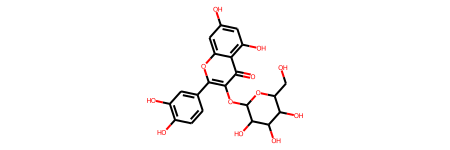

In [20]:
Chem.MolFromSmiles("C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)OC4C(C(C(C(O4)CO)O)O)O)O)O")

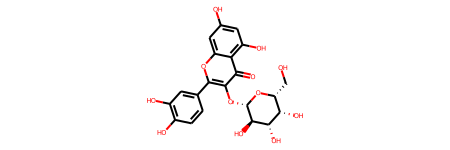

In [21]:
Chem.MolFromSmiles("C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O[C@H]4[C@@H]([C@H]([C@H]([C@H](O4)CO)O)O)O)O)O")